### Task 2: K- Means Clustering


### Author: Ahmed Mohamed Ragab


## Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns

## Load Data

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### We find the optimum number of clusters for K Means using Elbow Method

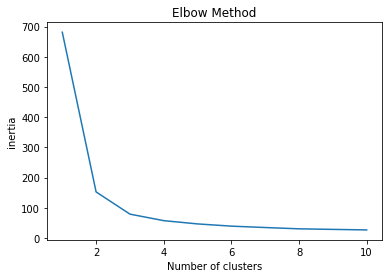

In [ ]:
all_inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i ,max_iter=300,n_init=10,random_state=42).fit(df)
    all_inertia.append(kmeans.inertia_)

plt.plot(range(1,11),all_inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df)

In [ ]:
df['label']= y_kmeans
df.loc[df["label"] == 0, "label"] = 'Iris-setosa'
df.loc[df["label"] == 1, "label"] = 'Iris-versicolour'
df.loc[df["label"] == 2, "label"] = 'Iris-virginica'
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,Iris-versicolour
1,4.9,3.0,1.4,0.2,Iris-versicolour
2,4.7,3.2,1.3,0.2,Iris-versicolour
3,4.6,3.1,1.5,0.2,Iris-versicolour
4,5.0,3.6,1.4,0.2,Iris-versicolour


## Plotting Clusters

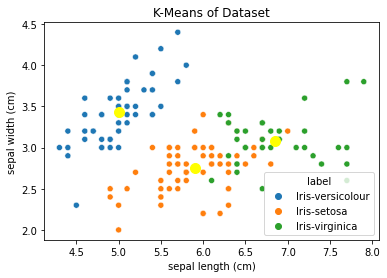

In [ ]:
sns.scatterplot(data=df,x="sepal length (cm)",y="sepal width (cm)",hue='label',palette='tab10')
plt.title("K-Means of Dataset")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.show()